# An introduction to matplotlib

Matplotlib is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (Graphical User Interface) toolkits.

Matplotlib comes with a convenience sub-package called **`pyplot`**. It is a general convention to import this module as **`plt`**:

In [1]:
import matplotlib.pyplot as plt

## The matplotlib figure

At the heart of **every** matplotlib plot is the "Figure" object. The "Figure" object is the top level concept that can be drawn to one of the many output formats, or simply just to screen. Any object that can be drawn in this way is known as an "Artist" in matplotlib.

Let's create our first artist using pyplot, and then show it:

In [2]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the "Axes" artist. The Axes artist represents the "data space" of a typical plot. A rectangular axes (the most common axes, but not the only axes, e.g. polar plots) will have two Axis Artists with tick labels and tick marks.

There is no limit on the number of Axes artists that can exist on a Figure artist. Let's go ahead and create a figure with a single Axes Artist, and show it using pyplot:

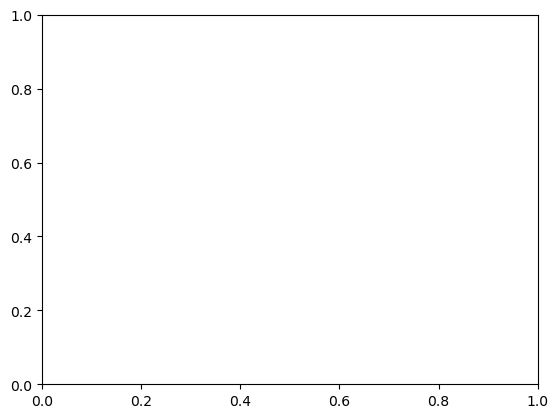

In [3]:
ax = plt.axes()
plt.show()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist; we just didn't need to capture it into a variable. We can access the created object with the "state" functions found in pyplot: **`plt.gcf()`** and **`plt.gca()`**.

### Exercise 1

Go to matplotlib.org and search for what these strangely named functions do.

Hint: you will find multiple results so remember we are looking for the ``pyplot`` versions of these functions.

## Working with the axes

Most of your time building a graphic in matplotlib will be spent on the Axes artist. Whilst the matplotlib documentation for the Axes artist is very detailed, it is also rather difficult to navigate (though this is an area of ongoing improvement).
As a result, it is often easier to find new plot types by looking at the pyplot module's documentation.

The first and most common Axes method is ``plot``. Go ahead and look at the ``plot`` documentation from the following sources:

 * http://matplotlib.org/api/pyplot_summary.html
 * http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
 * http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.plot

Plot can be used to draw one or more lines in axes data space:

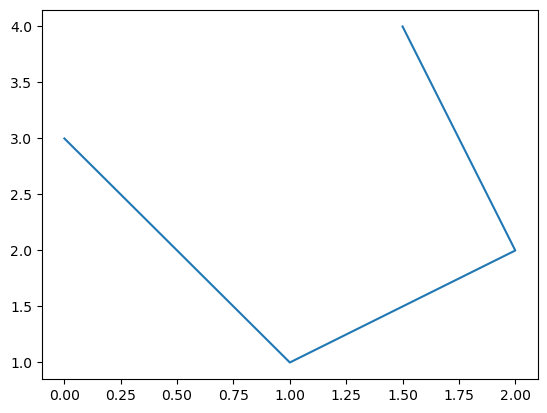

In [4]:
ax = plt.axes()
line1, = ax.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
plt.show()

Notice how the axes view limits (``ax.viewLim``) have been updated to include the whole of the line.
Should we want to add some spacing around the edges of our axes we could set the axes margin using the Axes artist's [``margins``](http://matplotlib.org/api/axes_api.html?highlight=axes#matplotlib.axes.Axes.margins) method. Alternatively, we could manually set the limits with the Axes artist's [``set_xlim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_xlim) and [``set_ylim``](http://matplotlib.org/api/axes_api.html?#matplotlib.axes.Axes.set_ylim) methods.

### Exercise 2

Modify the previous example to produce three different figures that control the limits of the axes.

1\. Manually set the x and y limits to `[0.5, 2]` and `[1, 5]` respectively.

  2\. Define a margin such that there is 10% whitespace inside the axes around the drawn line (Hint: numbers to margins are normalised such that 0% is 0.0 and 100% is 1.0).

3\. Set a 10% margin on the axes with the lower y limit set to 0. (Note: order is important here)

The previous example can be simplified to be even shorter. We are not using the line artist returned by `ax.plot()` so we don't need to store it in a variable. In addition, in exactly the same way that we didn't *need* to manually create a Figure artist when using the ``pyplot.axes`` method, we can remove the ``plt.axes`` if we use the ``plot`` function from ``pyplot``. Our simple line example then becomes:

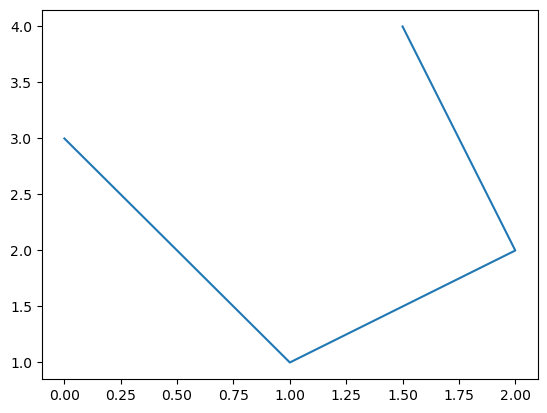

In [5]:
plt.plot([0, 1, 2, 1.5], [3, 1, 2, 4])
plt.show()

The simplicity of this example shows how visualisations can be produced quickly and easily with matplotlib, but it is worth remembering that for full control of Figure and Axes artists we can mix the convenience of ``pyplot`` with the power of matplotlib's object oriented design.

### Exercise 3

By calling ``plot`` multiple times, create a single axes showing the line plots of $y=sin(x)$ and $y=cos(x)$ in the interval $[0, 2\pi]$ with 200 linearly spaced $x$ samples.

## Multiple axes on the same figure (aka subplot)

Matplotlib makes it relatively easy to add more than one Axes artist to a figure. The ``add_subplot`` method on a Figure artist, which is wrapped by the ``subplot`` function in ``pyplot``, adds an Axes artist in the grid position specified. To compute the position, we must tell matplotlib the number of rows and columns to separate the figure into, and which number the axes to be created is (1 based).

For example, to create axes at the top right and bottom left of a $3 x 2$ notional grid of Axes artists the grid specifications would be ``2, 3, 3`` and ``2, 3, 4`` respectively:

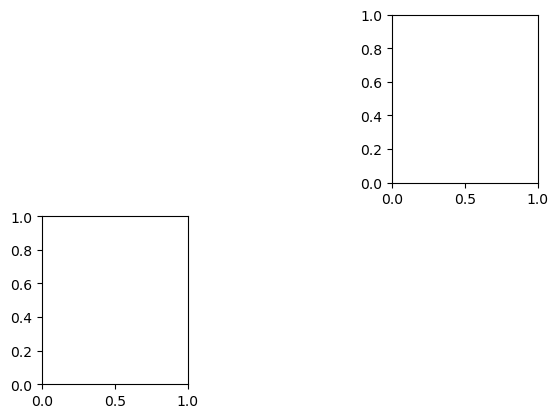

In [6]:
top_right_ax = plt.subplot(2, 3, 3)
bottom_left_ax = plt.subplot(2, 3, 4)

plt.show()

**Exercise 3 continued:** Copy the answer from the previous task (plotting $y=sin(x)$ and $y=cos(x)$) and add the appropriate ``plt.subplot`` calls to create a figure with two rows of Axes artists, one showing $y=sin(x)$ and the other showing $y=cos(x)$.

## Further plot types

Matplotlib comes with a huge variety of different plot types. Here is a quick demonstration of the more common ones.

In [7]:
import numpy as np

In [8]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)

In [14]:
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))
data

array([[-1.        , -0.94939761, -0.80271164, ..., -0.80271164,
        -0.94939761, -1.        ],
       [-1.21497044, -1.16436805, -1.01768208, ..., -1.01768208,
        -1.16436805, -1.21497044],
       [-1.4198891 , -1.36928671, -1.22260074, ..., -1.22260074,
        -1.36928671, -1.4198891 ],
       ...,
       [-0.5801109 , -0.52950851, -0.38282254, ..., -0.38282254,
        -0.52950851, -0.5801109 ],
       [-0.78502956, -0.73442717, -0.5877412 , ..., -0.5877412 ,
        -0.73442717, -0.78502956],
       [-1.        , -0.94939761, -0.80271164, ..., -0.80271164,
        -0.94939761, -1.        ]])

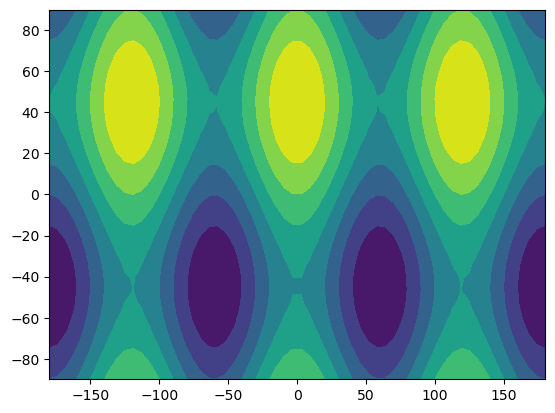

In [15]:
plt.contourf(x, y, data)
plt.show()

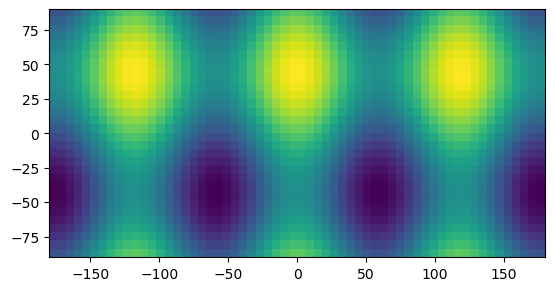

In [16]:
plt.imshow(data, extent=[-180, 180, -90, 90],
           interpolation='nearest', origin='lower')
plt.show()

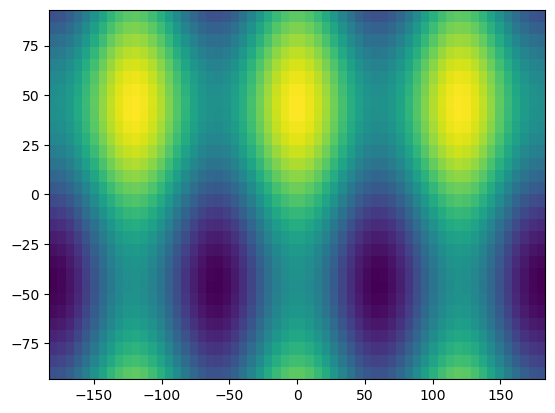

In [17]:
plt.pcolormesh(x, y, data)
plt.show()

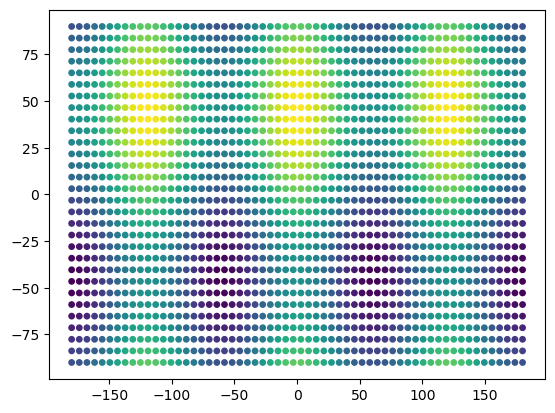

In [18]:
plt.scatter(x2d, y2d, c=data, s=15)
plt.show()

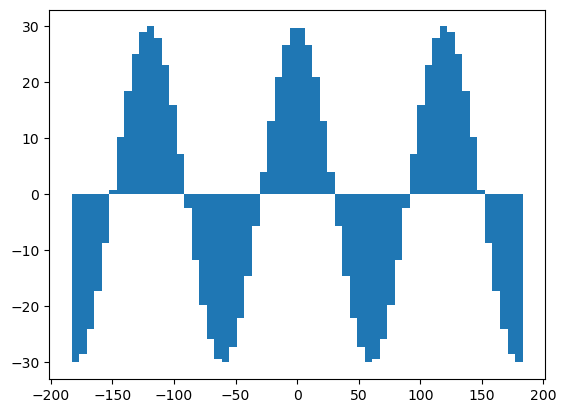

In [19]:
plt.bar(x, data.sum(axis=0), width=np.diff(x)[0])
plt.show() 

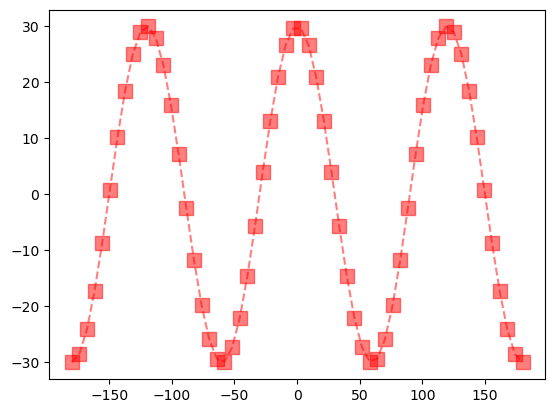

In [23]:
plt.plot(x, data.sum(axis=0), linestyle='--',
         marker='s', markersize=10, color='red', alpha=0.5)
plt.show()

## Titles, Legends, colorbars and annotations

Matplotlib has convenience functions for the addition of plot elements such as titles, legends, colorbars and text based annotation.

The ``suptitle`` pyplot function allows us to set the title of a figure, and the ``set_title`` method on an Axes artist allows us to set the title of an individual axes. Additionally Axes artists have methods named ``set_xlabel`` and ``set_ylabel`` to label the respective x and y Axis artists (that's Axis, not Axes). Finally, we can add text, located by data coordinates, with the ``text`` method on an Axes artist.

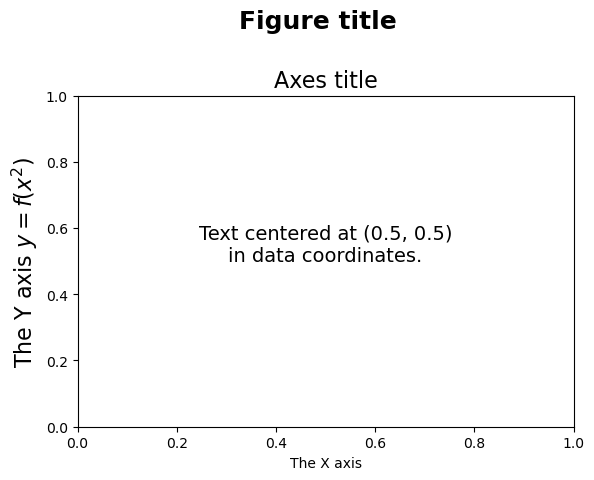

In [25]:
fig = plt.figure()
ax = plt.axes()
# Adjust the created axes so its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)
fig.suptitle('Figure title', fontsize=18, fontweight='bold')
ax.set_title('Axes title', fontsize=16)
ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x^2)$', fontsize=16)
ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)
plt.show()

The creation of a legend is as simple as adding a "label" to lines of interest. This can be done in the call to ``plt.plot`` and then followed up with a call to ``plt.legend``:

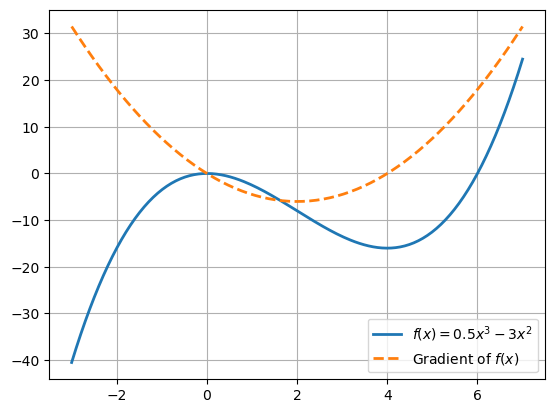

In [26]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5 * x ** 3 - 3 * x ** 2, linewidth=2,
         label='$f(x)=0.5x^3-3x^2$')
plt.plot(x, 1.5 * x ** 2 - 6 * x, linewidth=2, linestyle='--',
         label='Gradient of $f(x)$', )
plt.legend(loc='lower right')
plt.grid()
plt.show()

Colorbars are created with the ``plt.colorbar`` function:

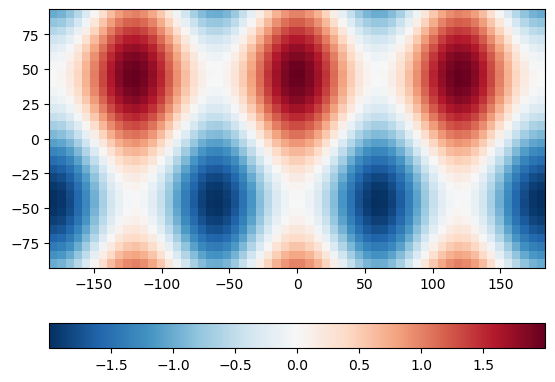

In [30]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))

plt.pcolormesh(x, y, data, cmap='RdBu_r')
plt.colorbar(orientation='horizontal')
plt.show()

Matplotlib comes with powerful annotation capabilities, which  are described in detail at http://matplotlib.org/users/annotations_intro.html.

The annotation's power can mean that the syntax is a little harder to read, which is demonstrated by one of the simplest examples of using annotate.

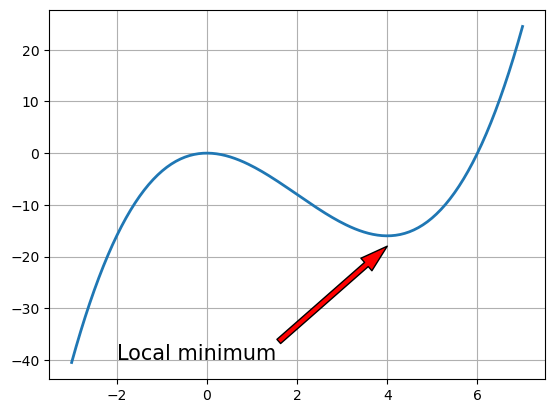

In [33]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5*x**3 - 3*x**2, linewidth=2)
plt.annotate('Local minimum',
             xy=(4, -18),
             xytext=(-2, -40), fontsize=15,
             arrowprops={'facecolor': 'red', 'headlength': 20})
plt.grid()
plt.show()

## Saving your plots

You can save a figure using **`plt.savefig`**. This function accepts a filename as input, and saves the current figure to the given file. The format of the file is inferred from the file extension:

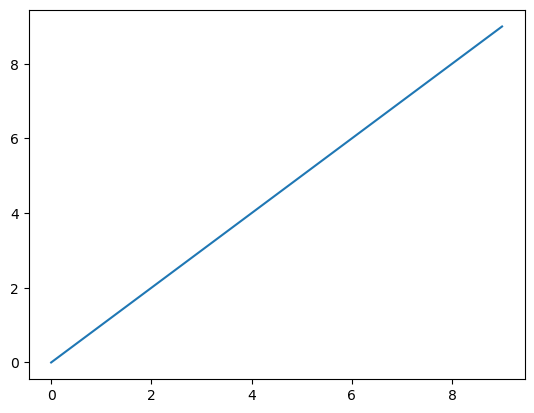

In [34]:
plt.plot(range(10))
plt.savefig('my_plot.png')

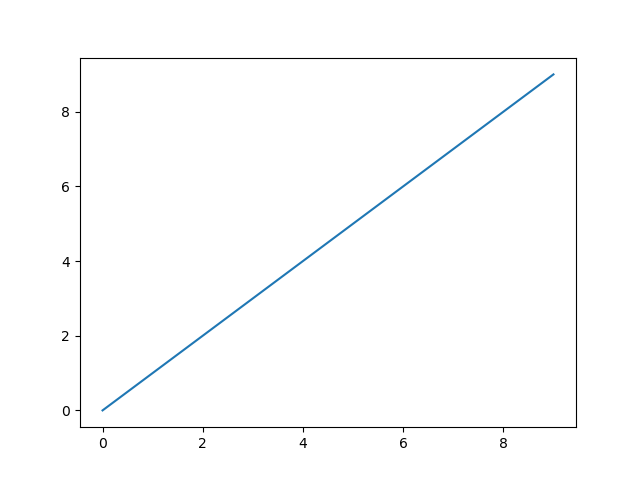

In [35]:
from IPython.display import Image
Image(filename='my_plot.png') 

Matplotlib supports many output file formats, including most commonly used ones. You can see a list of the supported file formats including the filename extensions they are recognised by with:

In [36]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff'],
 'WebP Image Format': ['webp']}

<Figure size 640x480 with 0 Axes>

## Further steps

Matplotlib has extremely comprehensive documentation at http://matplotlib.org/. Particularly useful parts for beginners are the pyplot summary and the example gallery:

* pyplot summary: http://matplotlib.org/api/pyplot_summary.html
* example gallery: http://matplotlib.org/examples/index.html

## Exercise 4: random walks

This exercise requires the use of many of the elements we've discussed (and a few extra ones too, remember the documentation for matplotlib is comprehensive!). We'll start by defining a random walk and some statistical population data for us to plot:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

n_steps = 500
t = np.arange(n_steps)

# Probability distribution:
mu = 0.002    # Mean
sigma = 0.01  # Standard deviation

# Generate a random walk, with position X as a function of time:
S = mu + sigma * np.random.randn(n_steps)
X = S.cumsum()

# Calculate the 1 sigma upper and lower analytic population bounds:
lower_bound = mu * t - sigma * np.sqrt(t)
upper_bound = mu * t + sigma * np.sqrt(t)

1\. Plot the walker position `X` against time (`t`) using a solid blue line of width 2 and give it a label so that it will appear in a legend as "walker position".

2\. Plot the population mean (`mu*t`) against time (`t`) using a black dashed line of width 1 and give it a label so that it will appear in a legend as "population mean".

3\. Fill the space between the variables `upper_bound` and `lower_bound` using yellow with alpha (transparency) of 0.5, label this so that it will appear in a legend as "1 sigma range" (hint: see the `fill_between` method of an axes or `pyplot.fill_between`).

4\. Draw a legend in the upper left corner of the axes (hint: you should have already set the labels for each line when you created them).

5\. Label the x-axis "num steps" and the y-axis "position", and draw gridlines on the axes (hint: `ax.grid` toggles the state of the grid).

6\. (harder) Fill the area under the walker position curve that is above the upper bound of the population mean using blue with alpha 0.5 (hint: `fill_between` can take a keyword argument called `where` that allows you to limit where filling is drawn).